In [1]:
import sys
sys.path += ['../..']

import os

import tarfile
import json

import matplotlib.pyplot as plt
import re

In [2]:
PATH_TO_CWL_DATA = '../week7/structured-2018-01-14-neworleans/'
TAR_FILE_NAME = 'structured-2018-06-17-anaheim.tar.gz'

EVENT = 'structured-2018-01-14-neworleans/'
MATCH = 'structured-1515788270-56925b97-0ea7-5d64-b76b-829c30867fee.json'

PATH_TO_WW2_MAPS = '../week6/cwl-data/maps/ww2/'

MAP_IMAGES = {
    'Aachen': 'aachen.png',
    'Ardennes Forest': 'ardennes_forest.png',
    'Flak Tower': 'flaktower.png',
    'Gibraltar': 'gibraltar.png',
    'London Docks': 'london_docks.png',
    'Sainte Marie du Mont': 'sainte_marie_du_mont.png' ,
    'USS Texas': 'uss_texas.png',
    'Valkyrie': 'valkyrie.png'
}

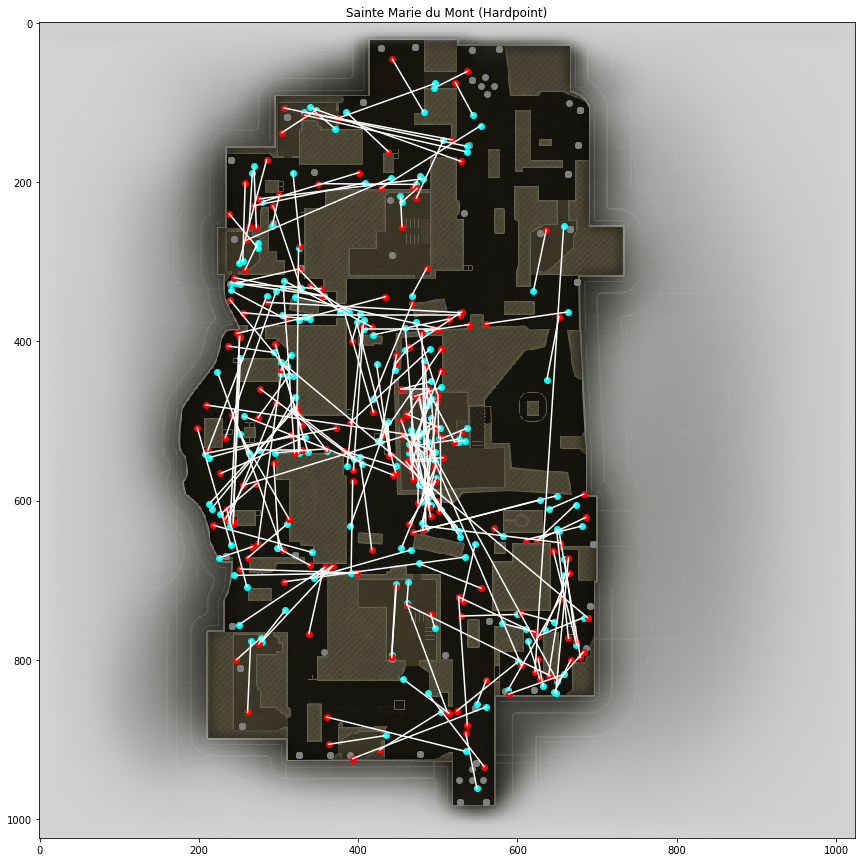

In [8]:
EVENT = 'structured-2018-01-14-neworleans/'
for filename in os.listdir('../week7/structured-2018-01-14-neworleans/'):
    MATCH = filename
    m = re.search('^(.*?).json', MATCH)
    m = m.group(1)
    with open('./{}{}'.format(EVENT,MATCH), 'r') as match_file:
    # get match data
        match = json.load(match_file)

        kill_pos, death_pos, spawn_pos = {'x': [], 'y': []}, {'x': [], 'y': []}, {'x': [], 'y': []}
    
    # get pos data
    events = match['events']
    for evt in events:
        if evt['type'] == 'spawn':
            spawn_pos['x'].append( evt['data']['pos']['x'] )
            spawn_pos['y'].append( evt['data']['pos']['y'] )
        if evt['type'] == 'death':
            kill_pos['x'].append( evt['data']['attacker']['pos']['x'] )
            kill_pos['y'].append( evt['data']['attacker']['pos']['y'] )
            death_pos['x'].append( evt['data']['pos']['x'] )
            death_pos['y'].append( evt['data']['pos']['y'] )

    # get map image
    map_file_name = PATH_TO_WW2_MAPS + MAP_IMAGES[match['map']]
    map_image = plt.imread(map_file_name)

    # create figure
    fig, ax = plt.subplots(1,1)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    # plot map
    ax.imshow(map_image)
    ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
    # plot spawns
    ax.scatter(spawn_pos['x'], spawn_pos['y'], color='gray')
    # plot death events
    ax.scatter(kill_pos['x'], kill_pos['y'], color='cyan')
    ax.scatter(death_pos['x'], death_pos['y'], color='red')
    # plot kill vectors
    for i in range( len(kill_pos['x']) ):
        plt.plot([kill_pos['x'][i], death_pos['x'][i]], [kill_pos['y'][i], death_pos['y'][i]], color='white')
    # set title
    ax.set_title('{} ({})'.format(match['map'], match['mode']))
    plt.savefig(m +'.png')
    break
    


In [12]:
print('''Select Event from\n neworleans\n atlanta\n birmingham\n proleague1\n relegation\n seattle\n anaheim\n proleague2\n champs''')
eventList = ['neworleans', 'atlanta', 'birmingham','proleagure1','relegation','seattle','anaheim','proleague2', 'champs']
x = input()
if str(x) in eventList:
    print("You've selected " + x)


Select Event from
 neworleans
 atlanta
 birmingham
 proleague1
 relegation
 seattle
 anaheim
 proleague2
 champs
champs
You've selected champs


In [22]:
for file in os.listdir('../week7/'):
    f = re.search('.*-.*-.*-.*-(.*)', file)
    if f is not None:
        f = f.group(1)
        if f == x:
            EVENT = file    
    
    
    

'structured-2018-08-19-champs'

In [19]:
for filename in os.listdir('../week7/' + EVENT + '/'):
    MATCH = filename
    m = re.search('^(.*?).json', MATCH)
    m = m.group(1)
    with open('./{}'.format(MATCH), 'r') as match_file:
    # get match data
        match = json.load(match_file)

        kill_pos, death_pos, spawn_pos = {'x': [], 'y': []}, {'x': [], 'y': []}, {'x': [], 'y': []}
    
    # get pos data
    events = match['events']
    for evt in events:
        if evt['type'] == 'spawn':
            spawn_pos['x'].append( evt['data']['pos']['x'] )
            spawn_pos['y'].append( evt['data']['pos']['y'] )
        if evt['type'] == 'death':
            kill_pos['x'].append( evt['data']['attacker']['pos']['x'] )
            kill_pos['y'].append( evt['data']['attacker']['pos']['y'] )
            death_pos['x'].append( evt['data']['pos']['x'] )
            death_pos['y'].append( evt['data']['pos']['y'] )

    # get map image
    map_file_name = PATH_TO_WW2_MAPS + MAP_IMAGES[match['map']]
    map_image = plt.imread(map_file_name)

    # create figure
    fig, ax = plt.subplots(1,1)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    # plot map
    ax.imshow(map_image)
    ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
    # plot spawns
    ax.scatter(spawn_pos['x'], spawn_pos['y'], color='gray')
    # plot death events
    ax.scatter(kill_pos['x'], kill_pos['y'], color='cyan')
    ax.scatter(death_pos['x'], death_pos['y'], color='red')
    # plot kill vectors
    for i in range( len(kill_pos['x']) ):
        plt.plot([kill_pos['x'][i], death_pos['x'][i]], [kill_pos['y'][i], death_pos['y'][i]], color='white')
    # set title
    ax.set_title('{} ({})'.format(match['map'], match['mode']))
    plt.savefig(m +'.png')
    break

FileNotFoundError: [Errno 2] No such file or directory: './structured-1534713615-ffdc20e7-291b-5e1f-9372-7d83cb7a2312.json'

In [10]:
structured-1534713615-ffdc20e7-291b-5e1f-9372-7d83cb7a2312.json

{'title': 'ww2',
 'platform': 'ps4',
 'id': '4b48e4c3-4ae8-58fb-afa9-54cc65e18c51',
 'series_id': 'champs-losers-4-2',
 'start_time_s': 1515949335,
 'end_time_s': 1515950036,
 'duration_ms': 701000,
 'mode': 'Hardpoint',
 'map': 'Sainte Marie du Mont',
 'rounds': 1,
 'hp_hill_names': ['restaurant', 'winery', 'parking', 'lookout'],
 'hp_hill_rotations': 12,
 'teams': [{'name': 'EVIL GENIUSES',
   'score': 250,
   'is_victor': True,
   'round_scores': [17, 22, 15, 19, 40, 23, 18, 23, 9, 43, 0, 21],
   'side': 'home'},
  {'name': 'DOOM',
   'score': 245,
   'is_victor': False,
   'round_scores': [28, 25, 35, 17, 8, 26, 16, 6, 39, 0, 44, 1],
   'side': 'away'}],
 'players': [{'name': 'ACHES',
   'team': 'EVIL GENIUSES',
   'kills': 29,
   'deaths': 31,
   'kd': 0.94,
   'kills_per_10min': 24.8,
   'deaths_per_10min': 26.5,
   'assists': 9,
   'headshots': 1,
   'suicides': 0,
   'team_kills': 0,
   'team_deaths': 1,
   'stayed_alive_kills': 19,
   'hits': 125,
   'shots': 514,
   'accuracy